# Allen_atlas_16bit_hierarch_labels
The purpose of this notebook is to remake the Allen 2017 atlas segmentation layer using ids where the parent ids are always lower than the children. This will make it possible to use the neuroglancer segment equivalences to merge children to their parents and the reverse. 

The JSON ontology file has a key called "graph_order" which is the ID that we need. This starts at 0, and we will instead want to start at 1. The other advantage of this is it guarantees that we will have a 16-bit volume.

In this notebook I remake the annotation volume with the corrected ids. I also make the segment_properties info file corresponding to these corrected ids. 

I made the actual layer using a script: /home/ahoag/ngdemo/src/make_precomputed_allenatlas_2017_16bit_hierarch_labels.py 

In [286]:
import neuroglancer
import json, csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import graphviz
import time

%matplotlib inline  

In [6]:
atlas_dir = '/jukebox/LightSheetTransfer/atlas/allen_atlas/'
annotation_file_2017_32bit = atlas_dir + 'annotation_2017_25um_sagittal_forDVscans.tif'
annotation_vol_2017_32bit = tifffile.imread(annotation_file_2017_32bit)
xlsx_file = atlas_dir + '/allen_id_table_w_voxel_counts.xlsx'

TypeError: asarray() got an unexpected keyword argument 'dtype'

In [7]:
annotation_vol_2017_32bit = np.array(annotation_vol_2017_32bit,dtype='uint32')

In [8]:
unique_ids = np.unique(annotation_vol_2017_32bit)

In [9]:
unique_ids

array([        0,         1,         2,         6,         7,         9,
              10,        12,        15,        17,        19,        20,
              23,        26,        27,        28,        30,        33,
              35,        36,        38,        41,        42,        50,
              52,        54,        56,        58,        59,        62,
              63,        64,        66,        67,        68,        72,
              74,        75,        78,        81,        83,        84,
              88,        91,        93,        96,        97,        98,
             100,       101,       102,       105,       106,       108,
             113,       114,       115,       117,       118,       120,
             121,       122,       123,       125,       126,       128,
             129,       131,       132,       133,       136,       139,
             140,       143,       145,       146,       147,       148,
             149,       153,       155,       156, 

In [11]:
len(unique_ids)

619

In [14]:
df_allen = pd.read_excel(xlsx_file).sort_values("id") # had to pip install xlrd to get read_excel() to work
df_allen

,Unnamed: 0,name,acronym,id,atlas_id,parent_structure_id,parent_name,parent_acronym,voxels_in_structure
775,775,"Tuberomammillary nucleus, ventral part",TMv,1,424.0,557.0,Tuberomammillary nucleus,TM,6931
78,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,990.0,345.0,"Primary somatosensory area, mouth",SSp-m,7339
1316,1316,secondary fissure,sec,3,707.0,1040.0,grooves of the cerebellar cortex,grv of CBX,0
812,812,Inferior colliculus,IC,4,141.0,339.0,"Midbrain, sensory related",MBsen,0
1201,1201,internal capsule,int,6,566.0,784.0,corticospinal tract,cst,134366
...,...,...,...,...,...,...,...,...,...
875,875,"Interpeduncular nucleus, intermediate",IPI,607344850,NaN,100.0,NaN,NaN,0
876,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,NaN,100.0,NaN,NaN,0
877,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,NaN,100.0,NaN,NaN,0
878,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,NaN,100.0,NaN,NaN,0


In [15]:
ids=df_allen['id']
names = df_allen['name']
parent_ids=df_allen['parent_structure_id']
ss_id_dict = {ids[ii]:names[ii] for ii in range(len(df_allen))}

In [20]:
# ontology_file = '/home/ahoag/ngdemo/graphviz/allen_ontology.json'
ontology_file = atlas_dir + '/allen.json'
# test_ontology_file = 'test_ontology.json'
# with open(test_ontology_file) as json_file:
#     test_data = json.load(json_file)
    
# ontology_file = 'allen_ontology.json'
with open(ontology_file) as json_file:
    data = json.load(json_file)

In [21]:
data

{'id': 997,
 'atlas_id': -1,
 'ontology_id': 1,
 'acronym': 'root',
 'name': 'root',
 'color_hex_triplet': 'FFFFFF',
 'graph_order': 0,
 'st_level': 0,
 'hemisphere_id': 3,
 'parent_structure_id': None,
 'children': [{'id': 8,
   'atlas_id': 0,
   'ontology_id': 1,
   'acronym': 'grey',
   'name': 'Basic cell groups and regions',
   'color_hex_triplet': 'BFDAE3',
   'graph_order': 1,
   'st_level': 1,
   'hemisphere_id': 3,
   'parent_structure_id': 997,
   'children': [{'id': 567,
     'atlas_id': 70,
     'ontology_id': 1,
     'acronym': 'CH',
     'name': 'Cerebrum',
     'color_hex_triplet': 'B0F0FF',
     'graph_order': 2,
     'st_level': 2,
     'hemisphere_id': 3,
     'parent_structure_id': 8,
     'children': [{'id': 688,
       'atlas_id': 85,
       'ontology_id': 1,
       'acronym': 'CTX',
       'name': 'Cerebral cortex',
       'color_hex_triplet': 'B0FFB8',
       'graph_order': 3,
       'st_level': 3,
       'hemisphere_id': 3,
       'parent_structure_id': 567,
   

In [22]:
# Make the reassignment dictionary, as well as a dictionary mapping new ID to name

def make_reassignment_dict(dic,output_dic=None):
    """ Make a dictionary mapping original ID to 
    """
    if not output_dic:
        output_dic = {}
    name = dic.get('name')
    graph_order = dic.get('graph_order') + 1
    ID = dic.get('id')
    if ID not in output_dic.keys():
        if ID not in ss_id_dict.keys():
            print("No entry in ss for:")
            print(ID,name)
        else:
            ss_name = ss_id_dict[ID]
            if name != ss_name:
                print("Name mismatch")
                print(ID,name,"    ",ss_name)
        output_dic[ID] = graph_order
    children = dic.get('children')
    for child in children:
        child_id = child.get('id')
        make_reassignment_dict(child,output_dic)
    return output_dic

In [23]:
output_dic = {}
new_dic = make_reassignment_dict(data,output_dic)

#ID_graph name_graph name_ss


In [25]:
new_dic

{997: 1,
 8: 2,
 567: 3,
 688: 4,
 695: 5,
 315: 6,
 184: 7,
 68: 8,
 667: 9,
 526157192: 10,
 526157196: 11,
 526322264: 12,
 500: 13,
 107: 14,
 219: 15,
 299: 16,
 644: 17,
 947: 18,
 985: 19,
 320: 20,
 943: 21,
 648: 22,
 844: 23,
 882: 24,
 993: 25,
 656: 26,
 962: 27,
 767: 28,
 1021: 29,
 1085: 30,
 453: 31,
 12993: 32,
 12994: 33,
 12995: 34,
 12996: 35,
 12997: 36,
 12998: 37,
 322: 38,
 793: 39,
 346: 40,
 865: 41,
 921: 42,
 686: 43,
 719: 44,
 353: 45,
 558: 46,
 838: 47,
 654: 48,
 702: 49,
 889: 50,
 929: 51,
 329: 52,
 981: 53,
 201: 54,
 1047: 55,
 1070: 56,
 1038: 57,
 1062: 58,
 480149202: 59,
 480149206: 60,
 480149210: 61,
 480149214: 62,
 480149218: 63,
 480149222: 64,
 480149226: 65,
 337: 66,
 1030: 67,
 113: 68,
 1094: 69,
 1128: 70,
 478: 71,
 510: 72,
 345: 73,
 878: 74,
 657: 75,
 950: 76,
 974: 77,
 1102: 78,
 2: 79,
 369: 80,
 450: 81,
 854: 82,
 577: 83,
 625: 84,
 945: 85,
 1026: 86,
 361: 87,
 1006: 88,
 670: 89,
 1086: 90,
 1111: 91,
 9: 92,
 461: 93,


In [ ]:
new_dic

In [26]:
new_dic[484682528]

1261

In [28]:
# Now the graph with the new ids:
# verify that the parents always have lower ids than children by looking at the graph of this new dictionary
def make_id_graph(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
    acronym = dic.get('acronym')
    children = dic.get('children')
    orig_id = dic.get('id')
    new_id = str(new_dic[orig_id])
    graph.node(name,f'{acronym}: {new_id}')
    for child in children:
        child_name = child.get('name')
        graph.edge(name,child_name)
        make_id_graph(child,graph)
    return 

In [29]:
# Now the modified graph
Gnew = graphviz.Digraph()
make_id_graph(data,Gnew)

In [30]:
Gnew

In [31]:
Gnew.save('allen_2017_hierarch_labels.dot')

'allen_2017_hierarch_labels.dot'

Using the graph we can verify that the reassignment worked and all parents have lower ids than their children. Now that we have a reassignment dictionary we need to figure out how to apply it to the annotation volume without overwriting. I could imagine a conflict where we set 235 -> 981, but then later the original 981 gets assigned to some other number. 

I think the solution to this is to make a mask on the original volume for each id. Then loop through this list of masks and on a blank volume set the values of the dictionary to the masked region. Let's try it for a few regions as a test.

In [32]:
len(new_dic)

1327

In [33]:
new_vol = np.zeros_like(annotation_vol_2017_32bit,dtype='uint16')
np.shape(new_vol)

(456, 528, 320)

In [34]:
new_vol.dtype

dtype('uint16')

In [42]:
%%time
for orig_id in list(new_dic.keys()):
    new_id = new_dic[orig_id]
    print(orig_id,new_id)
    mask = annotation_vol_2017_32bit == orig_id
    new_vol[mask] = new_id

997 1
8 2
567 3
688 4
695 5
315 6
184 7
68 8
667 9
526157192 10
526157196 11
526322264 12
500 13
107 14
219 15
299 16
644 17
947 18
985 19
320 20
943 21
648 22
844 23
882 24
993 25
656 26
962 27
767 28
1021 29
1085 30
453 31
12993 32
12994 33
12995 34
12996 35
12997 36
12998 37
322 38
793 39
346 40
865 41
921 42
686 43
719 44
353 45
558 46
838 47
654 48
702 49
889 50
929 51
329 52
981 53
201 54
1047 55
1070 56
1038 57
1062 58
480149202 59
480149206 60
480149210 61
480149214 62
480149218 63
480149222 64
480149226 65
337 66
1030 67
113 68
1094 69
1128 70
478 71
510 72
345 73
878 74
657 75
950 76
974 77
1102 78
2 79
369 80
450 81
854 82
577 83
625 84
945 85
1026 86
361 87
1006 88
670 89
1086 90
1111 91
9 92
461 93
182305689 94
182305693 95
182305697 96
182305701 97
182305705 98
182305709 99
182305713 100
378 101
873 102
806 103
1035 104
1090 105
862 106
893 107
1057 108
36 109
180 110
148 111
187 112
638 113
662 114
677 115
897 116
1106 117
1010 118
1058 119
857 120
849 121
247 122
1011 1

711 945
1039 946
903 947
642 948
651 949
659 950
666 951
674 952
682 953
691 954
429 955
437 956
445 957
77 958
53 959
61 960
45 961
69 962
589508451 963
789 964
370 965
653 966
568 967
661 968
576 969
640 970
135 971
939 972
143 973
839 974
887 975
1048 976
372 977
83 978
136 979
106 980
203 981
235 982
955 983
963 984
307 985
395 986
1098 987
1107 988
852 989
859 990
938 991
970 992
978 993
154 994
161 995
177 996
169 997
995 998
1069 999
185 1000
193 1001
701 1002
209 1003
202 1004
225 1005
217 1006
765 1007
773 1008
781 1009
76 1010
379 1011
206 1012
230 1013
222 1014
512 1015
528 1016
1144 1017
1145 1018
1143 1019
645 1020
912 1021
10707 1022
10706 1023
10705 1024
920 1025
976 1026
10710 1027
10709 1028
10708 1029
984 1030
10713 1031
10712 1032
10711 1033
928 1034
992 1035
10716 1036
10715 1037
10714 1038
1001 1039
10719 1040
10718 1041
10717 1042
1091 1043
10722 1044
10721 1045
10720 1046
936 1047
10725 1048
10724 1049
10723 1050
944 1051
10728 1052
10727 1053
10726 1054
951 1055

In [43]:
np.count_nonzero(new_vol) # should be > 0 !

31796139

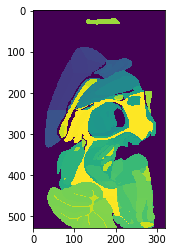

In [44]:
plt.imshow(new_vol[228])

Now check that the new volume's area where the root segment is defined is assigned to id=1

In [45]:
newrootmask = new_vol == 1

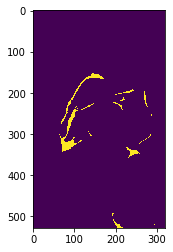

In [46]:
plt.imshow(newrootmask[228])

Looks good.

OK, now let's save this tiff volume.

## Save tiff volume

In [ ]:
new_vol.dtype

In [ ]:
new_vol.shape

In [47]:
filename = '/home/ahoag/ngdemo/data/allen_atlas/annotation_2017_25um_sagittal_16bit_hierarch_labels.tif'
tifffile.imsave(filename,new_vol)

## Save the segment properties file

In [49]:
example_segment_props_dict = {"@type": "neuroglancer_segment_properties",
    "inline": {"ids": ["149"],
               "properties":[{"id": "label", "type": "label", "values":
                              ["PVT: Paraventricular nucleus of the thalamus"]}]}}

In [48]:
segment_props_dict = {"@type": "neuroglancer_segment_properties",
    "inline": {"ids": [],
               "properties":[{"id": "label", "type": "label", "values":
                              []}]}}

In [50]:
# First, need to construct the string to put in the values list
df_allen['fullname'] = df_allen['acronym'].str.cat(df_allen['name'],sep=": ")
df_allen['fullname']

775           TMv: Tuberomammillary nucleus, ventral part
78      SSp-m6b: Primary somatosensory area, mouth, la...
1316                               sec: secondary fissure
812                               IC: Inferior colliculus
1201                                int: internal capsule
                              ...                        
875            IPI: Interpeduncular nucleus, intermediate
876            IPDM: Interpeduncular nucleus, dorsomedial
877           IPDL: Interpeduncular nucleus, dorsolateral
878          IPRL: Interpeduncular nucleus, rostrolateral
842              Su3: Supraoculomotor periaqueductal gray
Name: fullname, Length: 1327, dtype: object

In [51]:
# Now make a new column which is the new id 
df_allen['reassigned_id'] = [new_dic[x] for x in ids]
df_allen

,Unnamed: 0,name,acronym,id,atlas_id,parent_structure_id,parent_name,parent_acronym,voxels_in_structure,fullname,reassigned_id
775,775,"Tuberomammillary nucleus, ventral part",TMv,1,424.0,557.0,Tuberomammillary nucleus,TM,6931,"TMv: Tuberomammillary nucleus, ventral part",776
78,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,990.0,345.0,"Primary somatosensory area, mouth",SSp-m,7339,"SSp-m6b: Primary somatosensory area, mouth, la...",79
1316,1316,secondary fissure,sec,3,707.0,1040.0,grooves of the cerebellar cortex,grv of CBX,0,sec: secondary fissure,1317
812,812,Inferior colliculus,IC,4,141.0,339.0,"Midbrain, sensory related",MBsen,0,IC: Inferior colliculus,813
1201,1201,internal capsule,int,6,566.0,784.0,corticospinal tract,cst,134366,int: internal capsule,1202
...,...,...,...,...,...,...,...,...,...,...,...
875,875,"Interpeduncular nucleus, intermediate",IPI,607344850,NaN,100.0,NaN,NaN,0,"IPI: Interpeduncular nucleus, intermediate",876
876,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,NaN,100.0,NaN,NaN,0,"IPDM: Interpeduncular nucleus, dorsomedial",877
877,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,NaN,100.0,NaN,NaN,0,"IPDL: Interpeduncular nucleus, dorsolateral",878
878,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,NaN,100.0,NaN,NaN,0,"IPRL: Interpeduncular nucleus, rostrolateral",879


In [53]:
segment_props_dict['inline']['ids'] = [str(x) for x in df_allen['reassigned_id'].values]

In [54]:
segment_props_dict['inline']['properties'][0]['values'] = [str(x) for x in df_allen['fullname']]

In [55]:
segment_props_dict

{'@type': 'neuroglancer_segment_properties',
 'inline': {'ids': ['776',
   '79',
   '1317',
   '813',
   '1202',
   '890',
   '2',
   '92',
   '835',
   '1318',
   '870',
   '1214',
   '694',
   '557',
   '834',
   '1319',
   '492',
   '497',
   '1108',
   '340',
   '594',
   '1320',
   '832',
   '706',
   '506',
   '1162',
   '732',
   '221',
   '191',
   '1321',
   '855',
   '109',
   '1259',
   '721',
   '227',
   '202',
   '833',
   '1322',
   '246',
   '961',
   '1278',
   '723',
   '233',
   '1323',
   '840',
   '697',
   '501',
   '959',
   '1263',
   '729',
   '576',
   '1324',
   '864',
   '685',
   '507',
   '960',
   '1121',
   '783',
   '680',
   '1325',
   '862',
   '841',
   '8',
   '962',
   '1290',
   '722',
   '736',
   '1293',
   '184',
   '863',
   '1010',
   '958',
   '1180',
   '724',
   '737',
   '1294',
   '887',
   '978',
   '244',
   '1177',
   '1215',
   '730',
   '758',
   '1295',
   '888',
   '1099',
   '502',
   '1127',
   '728',
   '279',
   '942',
   '362

In [56]:
filename = '/home/ahoag/ngdemo/demo_bucket/atlas/allenatlas_2017_16bit_hierarch_labels/segment_properties/info'
with open(filename,'w') as outfile:
    json.dump(segment_props_dict,outfile,indent=2)

## Merge ontology feature
Here we will try to introduce a key that will use the segment properties mapping to collapse a segment you are hovering over to its parent region, along with all children of the same parent.

In [197]:
# neuroglancer.set_static_content_source(url='https://nglancer.pni.princeton.edu')
neuroglancer.set_static_content_source(url='http://localhost:8080')
viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.layers['Allen hierarch labels'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1305'
    )
print(viewer)

http://127.0.0.1:36430/v/f55e3c2e1315a676c4efad8f64e73106a64fe879/


In [198]:
# some helper graph functions
def get_progeny(dic,input_nodename,progeny_list=None):
    """
    Gets all of the descendents of a given input nodename.
    --- INPUT ---
    dic             The dictionary representing the JSON ontology graph
    input_nodename   The name of the region whose progeny you want to know
    """
    if progeny_list == None:
        progeny_list = []
    if input_nodename == 'root':
        return list(ontology_name_dict.keys()) 
        
    name = dic.get('name')

    children = dic.get('children')
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            progeny_list.append(child_name)
            get_progeny(child,input_nodename=child_name,progeny_list=progeny_list)
        return
    
    for child in children:
        child_name = child.get('name')
        get_progeny(child,input_nodename=input_nodename,progeny_list=progeny_list)
    return progeny_list

def get_parent(graph,input_nodename):
    if len(input_nodename.split(' ')) > 1:
        nodename_to_search = f'"{input_nodename}"'
    else:
        nodename_to_search = input_nodename
    edges_pointing_to_node=[x for x in graph.body if f'-> {nodename_to_search}' in x]
    if len(edges_pointing_to_node) == 0:
        return None
    elif len(edges_pointing_to_node) > 1:
        print("Error. There should not be more than one edge pointing to this node")
    else:
        parent_nodename = edges_pointing_to_node[0].split('->')[0].strip()
        # remove the extra quotes surrounding the nodename if there is more than one word
        if len(parent_nodename.split(' ')) > 1:
            return parent_nodename[1:-1]
        else:
            return parent_nodename
    return

In [60]:
get_parent(Gnew,"Cerebrum")

'Basic cell groups and regions'

In [61]:
get_parent(Gnew,"Simple lobule, granular layer")

'Simple lobule'

In [62]:
progeny_list=get_progeny(data,input_nodename='Medial group of the dorsal thalamus')
progeny_list

['Intermediodorsal nucleus of the thalamus',
 'Mediodorsal nucleus of thalamus',
 'Mediodorsal nucleus of the thalamus, central part',
 'Mediodorsal nucleus of the thalamus, lateral part',
 'Mediodorsal nucleus of the thalamus, medial part',
 'Submedial nucleus of the thalamus',
 'Perireunensis nucleus']

In [63]:
# For our key binding we will need a dictionary mapping our new ids with their region name
reassigned_ids = df_allen['reassigned_id'].values
region_names = df_allen['name'].values

ontology_id_dict = {reassigned_ids[ii]:region_names[ii] for ii in range(len(df_allen))}
ontology_id_dict

{776: 'Tuberomammillary nucleus, ventral part',
 79: 'Primary somatosensory area, mouth, layer 6b',
 1317: 'secondary fissure',
 813: 'Inferior colliculus',
 1202: 'internal capsule',
 890: 'Principal sensory nucleus of the trigeminal',
 2: 'Basic cell groups and regions',
 92: 'Primary somatosensory area, trunk, layer 6a',
 835: 'Superior colliculus, motor related, intermediate gray layer',
 1318: 'posterolateral fissure',
 870: 'Interfascicular nucleus raphe',
 1214: 'internal medullary lamina of the thalamus',
 694: 'Parataenial nucleus',
 557: 'Layer 6b, isocortex',
 834: 'Superior colliculus, motor related, intermediate white layer',
 1319: 'nodular fissure',
 492: 'Induseum griseum',
 497: 'Entorhinal area, lateral part, layer 2',
 1108: 'lateral olfactory tract, general',
 340: 'Posterior parietal association areas',
 594: 'Anterior amygdalar area',
 1320: 'simple fissure',
 832: 'Superior colliculus, motor related, deep gray layer',
 706: 'Intergeniculate leaflet of the lateral

In [64]:
# Also want the reverse dictionary, mapping region names to new ids
ontology_name_dict = {region_names[ii]:reassigned_ids[ii] for ii in range(len(df_allen))}
ontology_name_dict

{'Tuberomammillary nucleus, ventral part': 776,
 'Primary somatosensory area, mouth, layer 6b': 79,
 'secondary fissure': 1317,
 'Inferior colliculus': 813,
 'internal capsule': 1202,
 'Principal sensory nucleus of the trigeminal': 890,
 'Basic cell groups and regions': 2,
 'Primary somatosensory area, trunk, layer 6a': 92,
 'Superior colliculus, motor related, intermediate gray layer': 835,
 'posterolateral fissure': 1318,
 'Interfascicular nucleus raphe': 870,
 'internal medullary lamina of the thalamus': 1214,
 'Parataenial nucleus': 694,
 'Layer 6b, isocortex': 557,
 'Superior colliculus, motor related, intermediate white layer': 834,
 'nodular fissure': 1319,
 'Induseum griseum': 492,
 'Entorhinal area, lateral part, layer 2': 497,
 'lateral olfactory tract, general': 1108,
 'Posterior parietal association areas': 340,
 'Anterior amygdalar area': 594,
 'simple fissure': 1320,
 'Superior colliculus, motor related, deep gray layer': 832,
 'Intergeniculate leaflet of the lateral geni

In [65]:
len(ontology_id_dict)

1327

In [66]:
ontology_id_dict[1260]

'stria terminalis'

In [67]:
ontology_id_dict[1261]

'commissural branch of stria terminalis'

In [68]:
ontology_name_dict['stria terminalis']

1260

In [69]:
get_parent(Gnew,'Nucleus of reuniens') # Id 692

'Midline group of the dorsal thalamus'

In [70]:
get_parent(Gnew,'Midline group of the dorsal thalamus') # Id 667

'Thalamus, polymodal association cortex related'

In [71]:
get_parent(Gnew,'Basic cell groups and regions')

'root'

In [72]:
get_parent(Gnew,'root')

In [239]:
def contract_atlas(s):
    region_map = s.selected_values['Allen hierarch labels']
    named_tuple = region_map.value
    if named_tuple:
        if named_tuple.value:
            region_id = named_tuple.value
        else:
            region_id = named_tuple.key
        region_name = ontology_id_dict[region_id]
        # Look up parent name and then get corresponding ID
        parent_name = get_parent(Gnew,region_name)
        if not parent_name:
            with viewer.config_state.txn() as st:
                st.status_messages['hello'] = 'No parent found.'
            return
        parent_id = ontology_name_dict.get(parent_name)
        # find all progeny of this parent
        progeny_list = get_progeny(data,input_nodename=parent_name) # progeny names
        # initialize our equivalence list using the id-parent relationship we just found
        equivalence_list = [] 
        # Get the progeny ids and include them in the equivalence list
        for progeny_name in progeny_list:
            progeny_id = ontology_name_dict.get(progeny_name)
            if progeny_id:
                equivalence_list.append((progeny_id,parent_id)) 
        with viewer.txn() as txn:
            existing_equivalences = list(txn.layers['Allen hierarch labels'].layer.equivalences.items())
            final_equivalence_list = existing_equivalences + equivalence_list
            txn.layers['Allen hierarch labels'].layer.equivalences = final_equivalence_list
            print(txn.layers['Allen hierarch labels'].layer.equivalences.items())
        return
    else:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'No segment under cursor. Hover over segment to enable hierarchy tools' 
        return
    
def expand_atlas(s):
    region_map = s.selected_values['Allen hierarch labels']
    named_tuple = region_map.value
    if named_tuple:
        """ if the hovered segment is mapped to a parent, then start at the parent level"""
        if named_tuple.value:
            region_id = named_tuple.value
        else:
            region_id = named_tuple.key
        """ Find and remove any existing equivalences that involve this region_id"""
        with viewer.txn() as txn:
            equiv_map = txn.layers['Allen hierarch labels'].layer.equivalences
            if region_id not in equiv_map.keys():
                with viewer.config_state.txn() as st:
                    st.status_messages['hello'] = 'This segment is already at the lowest level in the hierarchy'
            else:
                print(f"isolating element {region_id}")
                equiv_map.delete_set(region_id)
                print(equiv_map.items())
        return
    else:
        st.status_messages['hello'] = 'No segment under cursor. Hover over segment to enable hierarchy tools' 
        return

In [377]:
def contract_atlas(s):
    with viewer.config_state.txn() as st:
        try:
            del st.status_messages['hello']
        except KeyError:
            pass
    """ first figure out the selected layer """
    with viewer.txn() as txn:
        if len(txn.layers) > 1:
            selected_layer_name = txn.selectedLayer.layer
            if not selected_layer_name:
                with viewer.config_state.txn() as st:
                    st.status_messages['hello'] = 'No layer selected. Select a layer (right click or ctrl+click the layer panel)'        
                    return
        elif len(txn.layers) == 1:
            selected_layer_name = txn.layers[0].name
        else:
            with viewer.config_state.txn() as st:
                st.status_messages['hello'] = 'No layers loaded. First load a layer to use this tool'        
                return

    try:
        region_map = s.selected_values[selected_layer_name]
    except KeyError:
        # you need to move your cursor to get the layer to be selectable again
        return
    named_tuple = region_map.value
    if named_tuple:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'key p pressed: contracting atlas' 
        if named_tuple.value:
            region_id = named_tuple.value
        else:
            region_id = named_tuple.key
        region_name = ontology_id_dict[region_id]
        # Look up parent name and then get corresponding ID
        parent_name = get_parent(Gnew,region_name)
        if not parent_name:
            with viewer.config_state.txn() as st:
                st.status_messages['hello'] = 'No parent found.'
            return
        parent_id = ontology_name_dict.get(parent_name)
        # find all progeny of this parent
        progeny_list = get_progeny(data,input_nodename=parent_name) # progeny names
        # initialize our equivalence list using the id-parent relationship we just found
        equivalence_list = [] 
        # Get the progeny ids and include them in the equivalence list
        for progeny_name in progeny_list:
            progeny_id = ontology_name_dict.get(progeny_name)
            if progeny_id:
                equivalence_list.append((progeny_id,parent_id)) 
        with viewer.txn() as txn:
            existing_equivalences = list(txn.layers[selected_layer_name].layer.equivalences.items())
            final_equivalence_list = existing_equivalences + equivalence_list
            txn.layers[selected_layer_name].layer.equivalences = final_equivalence_list
        return
    else:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'No segment under cursor. Hover over segment to enable hierarchy tools' 
        return
    
def expand_atlas(s):
    with viewer.config_state.txn() as st:
        try:
            del st.status_messages['hello']
        except KeyError:
            pass
    """ first figure out the selected layer """
    with viewer.txn() as txn:
        if len(txn.layers) > 1:
            selected_layer_name = txn.selectedLayer.layer
            if not selected_layer_name:
                with viewer.config_state.txn() as st:
                    st.status_messages['hello'] = 'No layer selected. Select a layer (right click or ctrl+click the layer panel)'        
                    return
        elif len(txn.layers) == 1:
            selected_layer_name = txn.layers[0].name
        else:
            with viewer.config_state.txn() as st:
                st.status_messages['hello'] = 'No layers loaded. First load a layer to use this tool'        
                return
    try:
        region_map = s.selected_values[selected_layer_name]
    except KeyError:
        # you need to move your cursor to get the layer to be selectable again
        return
    region_map = s.selected_values[selected_layer_name]
    named_tuple = region_map.value
    if named_tuple:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'key c pressed: expanding atlas' 
        """ if the hovered segment is mapped to a parent, then start at the parent level"""
        if named_tuple.value:
            region_id = named_tuple.value
        else:
            region_id = named_tuple.key
        """ Find and remove any existing equivalences that involve this region_id"""
        with viewer.txn() as txn:
            equiv_map = txn.layers[selected_layer_name].layer.equivalences
            if region_id not in equiv_map.keys():
                with viewer.config_state.txn() as st:
                    st.status_messages['hello'] = 'This segment is already at the lowest level in the hierarchy'
            else:
                equiv_map.delete_set(region_id)
        return
    else:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'No segment under cursor. Hover over segment to enable hierarchy tools' 
        return

In [381]:
# key binding to merge segment with its parent segment using the ontology
def add_key_bindings():
    index = np.random.randint(0,100000)
    viewer.actions.add(f'contract-atlas{index}', contract_atlas)
    viewer.actions.add(f'expand-atlas{index}', expand_atlas)
    with viewer.config_state.txn() as s:
        s.input_event_bindings.viewer['keyp'] = f'contract-atlas{index}'
        s.input_event_bindings.viewer['keyc'] = f'expand-atlas{index}'
        s.status_messages['hello'] = ('Merge ontology tool activated. '
            'To use the tool, press p to go up, c to go down in hierarchy.')


In [382]:
neuroglancer.set_static_content_source(url='http://localhost:8080')
viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.layers['Allen hierarch labels'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1338'
    )
#     s.layers['Allen layer 2'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1338'
#     )
print(viewer)

http://127.0.0.1:36430/v/4fee2fe21062f32d5fca040604d9c7ac8fca27ed/


In [383]:
add_key_bindings()

dict_items([(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)])
dict_items([(692, 693), (693, 693), (694, 693), (695, 693), (696, 693)])
dict_items([(692, 693), (693, 693), (694, 693), (695, 693), (696, 693)])
dict_items([(692, 693), (693, 693), (694, 693), (695, 693), (696, 693)])
dict_items([(692, 693), (693, 693), (694, 693), (695, 693), (696, 693)])
dict_items([(692, 693), (693, 693), (694, 693), (695, 693), (696, 693)])
dict_items([(692, 693), (693, 693), (694, 693), (695, 693), (696, 693)])


In [173]:
def reset_equivalences():
    with viewer.txn() as txn:
        txn.layers['Allen hierarch labels'].layer.equivalences = []

In [195]:
reset_equivalences()

In [ ]:
with viewer.config_state.txn() as s:
    del s.input_event_bindings.viewer['keyp']

In [ ]:
with viewer.config_state.txn() as s:
    print(s.input_event_bindings.viewer)

In [343]:
with viewer.txn() as s:
    print(s.layers[0].name)

Allen hierarch labels


In [334]:
with viewer.txn() as s:
    print(len(s.layers))

2


In [127]:
subG = graphviz.Digraph()
edge_list = [(667, 667), (668, 667), (669, 667), (670, 667), (671, 667), (672, 667), (673, 667), (674, 667), (675, 667), (676, 667), (677, 667), (678, 667), (679, 667), (680, 667), (681, 667), (682, 667), (683, 667), (684, 667), (685, 667), (686, 667), (687, 667), (688, 667), (689, 667), (690, 667), (691, 667), (692, 667), (693, 667), (694, 667), (695, 667), (696, 667), (697, 667), (698, 667), (699, 667), (700, 667), (701, 667), (702, 667), (703, 667), (704, 667), (705, 667), (706, 667), (707, 667), (708, 667), (709, 667), (710, 667), (711, 667), (712, 667), (713, 667), (714, 667), (715, 667)]
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
#     print(edge[0],edge[1])
        subG.edge(str(edge[0]),str(edge[1]))

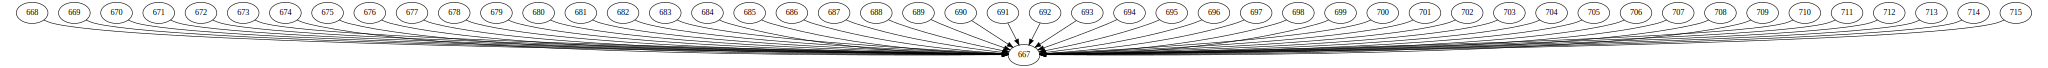

region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]
region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]
region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]


In [128]:
subG

[(695, 695), (692, 695), (693, 695)]
[667]
[(695, 695), (692, 695), (693, 695)]


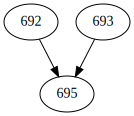

isolating element 692
dict_items([(693, 693), (695, 693)])
isolating element 693
dict_items([])


In [159]:
with viewer.txn() as s:
    s.layers['Allen hierarch labels'].layer.equivalences = [(695,692),(693,692)]
    equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
    edge_list = list(equiv_map.items())
    print(edge_list)
    print(list(equiv_map.members(667)))
    equiv_map.delete_set(667)
    edge_list = list(equiv_map.items())
    print(edge_list)
subG = graphviz.Digraph()
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
        subG.edge(str(edge[0]),str(edge[1]))
subG

In [ ]:
with viewer.txn() as s:
#     s.layers['Allen hierarch labels'].layer.equivalences = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
    s.layers['Allen hierarch labels'].layer.equivalences = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
    equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
    edge_list = list(equiv_map.items())
    print(edge_list)
    print(list(equiv_map.members(667)))
    equiv_map.delete_set(667)
    edge_list = list(equiv_map.items())
    print(edge_list)
subG = graphviz.Digraph()
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
        subG.edge(str(edge[0]),str(edge[1]))
subG

In [168]:
def make_subgraph(edge_list):
    subG = graphviz.Digraph()
    for edge in edge_list:
        if edge[0] == edge[1]:
            pass
        else:
            subG.edge(str(edge[0]),str(edge[1]))
    return subG

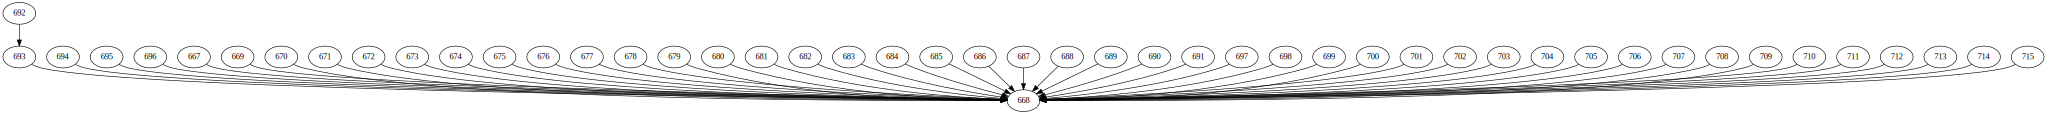

In [169]:
edge_list = [(692, 693), (693, 668), (694, 668), (695, 668), (696, 668), (668, 668), (667, 668), (669, 668), (670, 668), (671, 668), (672, 668), (673, 668), (674, 668), (675, 668), (676, 668), (677, 668), (678, 668), (679, 668), (680, 668), (681, 668), (682, 668), (683, 668), (684, 668), (685, 668), (686, 668), (687, 668), (688, 668), (689, 668), (690, 668), (691, 668), (697, 668), (698, 668), (699, 668), (700, 668), (701, 668), (702, 668), (703, 668), (704, 668), (705, 668), (706, 668), (707, 668), (708, 668), (709, 668), (710, 668), (711, 668), (712, 668), (713, 668), (714, 668), (715, 668)]

G = make_subgraph(edge_list)
G

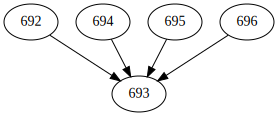

In [170]:
edge_list = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
G = make_subgraph(edge_list)
G

In [ ]:

prog=get_progeny(data,'root',progeny_list)
prog

In [ ]:
ontology_id_dict[1031]

In [ ]:
ontology_id_dict[1260]

In [ ]:
get_progeny(data,'stria terminalis')

In [ ]:
ontology_name_dict['stria terminalis']

In [ ]:
parent = ontology_id_dict[1031]
while parent != 'Cerebellum':
    parent = get_parent(Gnew,parent)
    print(parent)

In [181]:
def make_graph_current_edges():
    with viewer.txn() as s:
        equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
        edge_list = list(equiv_map.items())
    print(edge_list)
    subG = graphviz.Digraph()
    
    for edge in edge_list:
        if edge[0] == edge[1]:
            pass
        else:
            subG.edge(str(edge[0]),str(edge[1]))
    return subG

[(19, 19), (20, 19), (21, 19), (22, 19), (23, 19), (24, 19)]


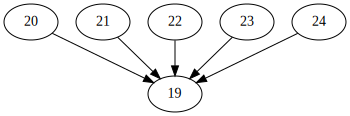

In [190]:
make_graph_current_edges()

[(13, 13), (14, 13), (15, 13), (16, 13), (17, 13), (18, 13), (19, 13), (20, 13), (21, 13), (22, 13), (23, 13), (24, 13), (25, 13), (26, 13), (27, 13), (28, 13), (29, 13), (30, 13)]


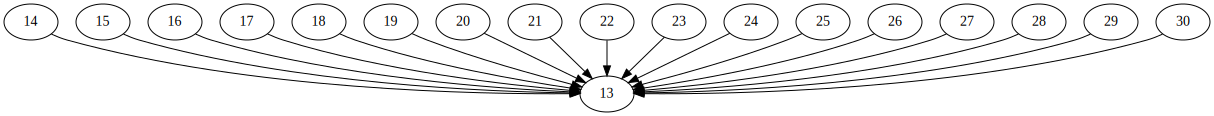

In [192]:
make_graph_current_edges()

In [191]:
1

1

dict_items([(19, 20), (20, 20), (21, 20), (22, 20), (23, 20), (24, 20), (14, 20), (13, 20), (15, 14), (16, 14), (17, 14), (18, 14), (25, 20), (26, 20), (27, 20), (28, 20), (29, 20), (30, 20)])


In [189]:
reset_equivalences()

dict_items([(20, 20), (19, 20), (21, 20), (22, 20), (23, 20), (24, 20)])


[(13, 13), (14, 13), (15, 13), (16, 13), (17, 13), (18, 13), (19, 13), (20, 13), (21, 13), (22, 13), (23, 13), (24, 13), (25, 13), (26, 13), (27, 13), (28, 13), (29, 13), (30, 13)]


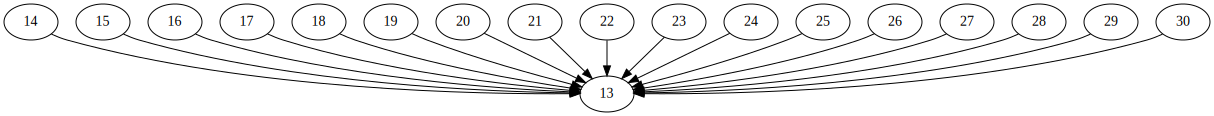

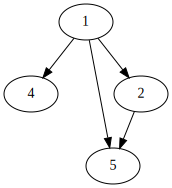

isolating element 13
dict_items([(14, 14), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14), (20, 14), (21, 14), (22, 14), (23, 14), (24, 14), (25, 14), (26, 14), (27, 14), (28, 14), (29, 14), (30, 14)])


In [185]:
edge_list = [(1,4),(1,5),(2,5),(1,2)]
make_subgraph(edge_list)

In [202]:
df_allen

,Unnamed: 0,name,acronym,id,atlas_id,parent_structure_id,parent_name,parent_acronym,voxels_in_structure,fullname,reassigned_id
775,775,"Tuberomammillary nucleus, ventral part",TMv,1,424.0,557.0,Tuberomammillary nucleus,TM,6931,"TMv: Tuberomammillary nucleus, ventral part",776
78,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,990.0,345.0,"Primary somatosensory area, mouth",SSp-m,7339,"SSp-m6b: Primary somatosensory area, mouth, la...",79
1316,1316,secondary fissure,sec,3,707.0,1040.0,grooves of the cerebellar cortex,grv of CBX,0,sec: secondary fissure,1317
812,812,Inferior colliculus,IC,4,141.0,339.0,"Midbrain, sensory related",MBsen,0,IC: Inferior colliculus,813
1201,1201,internal capsule,int,6,566.0,784.0,corticospinal tract,cst,134366,int: internal capsule,1202
...,...,...,...,...,...,...,...,...,...,...,...
875,875,"Interpeduncular nucleus, intermediate",IPI,607344850,NaN,100.0,NaN,NaN,0,"IPI: Interpeduncular nucleus, intermediate",876
876,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,NaN,100.0,NaN,NaN,0,"IPDM: Interpeduncular nucleus, dorsomedial",877
877,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,NaN,100.0,NaN,NaN,0,"IPDL: Interpeduncular nucleus, dorsolateral",878
878,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,NaN,100.0,NaN,NaN,0,"IPRL: Interpeduncular nucleus, rostrolateral",879


In [204]:
df_cols = df_allen.columns.tolist()
df_cols

['Unnamed: 0',
 'name',
 'acronym',
 'id',
 'atlas_id',
 'parent_structure_id',
 'parent_name',
 'parent_acronym',
 'voxels_in_structure',
 'fullname',
 'reassigned_id']

In [207]:
newcols = ['name','acronym','id','reassigned_id','parent_structure_id','parent_name','parent_acronym','fullname']
output_df=df_allen[newcols]
output_df

,name,acronym,id,reassigned_id,parent_structure_id,parent_name,parent_acronym,fullname
775,"Tuberomammillary nucleus, ventral part",TMv,1,776,557.0,Tuberomammillary nucleus,TM,"TMv: Tuberomammillary nucleus, ventral part"
78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,79,345.0,"Primary somatosensory area, mouth",SSp-m,"SSp-m6b: Primary somatosensory area, mouth, la..."
1316,secondary fissure,sec,3,1317,1040.0,grooves of the cerebellar cortex,grv of CBX,sec: secondary fissure
812,Inferior colliculus,IC,4,813,339.0,"Midbrain, sensory related",MBsen,IC: Inferior colliculus
1201,internal capsule,int,6,1202,784.0,corticospinal tract,cst,int: internal capsule
...,...,...,...,...,...,...,...,...
875,"Interpeduncular nucleus, intermediate",IPI,607344850,876,100.0,NaN,NaN,"IPI: Interpeduncular nucleus, intermediate"
876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,877,100.0,NaN,NaN,"IPDM: Interpeduncular nucleus, dorsomedial"
877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,878,100.0,NaN,NaN,"IPDL: Interpeduncular nucleus, dorsolateral"
878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,879,100.0,NaN,NaN,"IPRL: Interpeduncular nucleus, rostrolateral"


In [209]:
output_df_filename = '/home/ahoag/ngdemo/data/allen_atlas/allen_id_table_w_voxel_counts_hierarch_labels.csv'
output_df.to_csv(output_df_filename)

In [210]:
df = pd.read_csv(output_df_filename)
df

,Unnamed: 0,name,acronym,id,reassigned_id,parent_structure_id,parent_name,parent_acronym,fullname
0,775,"Tuberomammillary nucleus, ventral part",TMv,1,776,557.0,Tuberomammillary nucleus,TM,"TMv: Tuberomammillary nucleus, ventral part"
1,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,79,345.0,"Primary somatosensory area, mouth",SSp-m,"SSp-m6b: Primary somatosensory area, mouth, la..."
2,1316,secondary fissure,sec,3,1317,1040.0,grooves of the cerebellar cortex,grv of CBX,sec: secondary fissure
3,812,Inferior colliculus,IC,4,813,339.0,"Midbrain, sensory related",MBsen,IC: Inferior colliculus
4,1201,internal capsule,int,6,1202,784.0,corticospinal tract,cst,int: internal capsule
...,...,...,...,...,...,...,...,...,...
1322,875,"Interpeduncular nucleus, intermediate",IPI,607344850,876,100.0,NaN,NaN,"IPI: Interpeduncular nucleus, intermediate"
1323,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,877,100.0,NaN,NaN,"IPDM: Interpeduncular nucleus, dorsomedial"
1324,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,878,100.0,NaN,NaN,"IPDL: Interpeduncular nucleus, dorsolateral"
1325,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,879,100.0,NaN,NaN,"IPRL: Interpeduncular nucleus, rostrolateral"


In [213]:
viewer.state

ViewerState({"dimensions": {"x": [2.5e-05, "m"], "y": [2.5e-05, "m"], "z": [2.5e-05, "m"]}, "position": [185.5, 365.0245056152344, 235.1069793701172], "crossSectionOrientation": [0, 0.7071067690849304, 0, 0.7071067690849304], "crossSectionScale": 1, "projectionOrientation": [0.48580050468444824, 0.08500177413225174, 0.617066502571106, -0.6131896376609802], "projectionScale": 1024, "layers": [{"type": "segmentation", "source": "precomputed://http://localhost:1305", "tab": "segments", "equivalences": [["641", "642", "643", "644", "645", "646", "647", "648", "649", "650", "651", "652", "653", "654", "655", "656", "657", "658", "659", "660", "661", "662", "663", "664", "665", "666", "667", "668", "669", "670", "671", "672", "673", "674", "675", "676", "677", "678", "679", "680", "681", "682", "683", "684", "685", "686", "687", "688", "689", "690", "691", "692", "693", "694", "695", "696", "697", "698", "699", "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711

In [384]:
neuroglancer.set_static_content_source(url='http://localhost:8080')
viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.layers['Allen hierarch labels'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1338'
    )
    s.layers['Allen layer 2'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1338'
    )
print(viewer)

http://127.0.0.1:36430/v/bc23344304d2b08c17b30c3910f2a9dfb3951aa7/


In [385]:
add_key_bindings()

In [237]:
def my_action(s):
    print('Got my-action')
    print('  Mouse position: %s' % (s.mouse_voxel_coordinates,))
    print('  Layer selected values: %s' % (s.selected_values,))
    with viewer.config_state.txn() as s:
        s.status_messages['hello'] = 'We heard you.'
    with viewer.txn() as s:
        s.cross_section_scale = 8
viewer.actions.add('my-action', my_action)
with viewer.config_state.txn() as s:
    s.input_event_bindings.viewer['keyt'] = 'my-action'
    s.status_messages['hello'] = 'Welcome to this example'


Got my-action
  Mouse position: [167.7222 274.8021 228.5   ]
  Layer selected values: Map({"Allen hierarch labels": {"value": {"key": "685", "label": "IMD: Intermediodorsal nucleus of the thalamus"}}})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: None
  Layer selected values: Map({})
Got my-action
  Mouse position: [118.7222 384.3611 228.5   ]
  Layer selected values: Map({"Allen hierarch labels": {"value": {"key": "1301", "label": "AQ: cerebral aqu

In [232]:
np.random.randint(5,10)

8